In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py 
%matplotlib inline

In [13]:
snapfilename = '/project/projectdirs/desi/mocks/bgs/MXXL/snapshot/galaxy_catalogue_snapshot_55.hdf5'
f = h5py.File(snapfilename)

In [5]:
vel = f['Data/vel'][...]

In [6]:
pos = f['Data/pos'][...]

In [14]:
r_abs_mag = f['Data/abs_mag'][...]

In [15]:
f.close()

In [22]:
l_box = pos[:,0].max()

In [23]:
r_center = np.sqrt((pos[:,0]-l_box*0.5)**2 + (pos[:,1]-l_box*0.5)**2 + (pos[:,2]-l_box*0.5)**2)

In [52]:
r_bins = np.linspace(100,1500,9)
print(r_bins)
mean_vel_x = r_bins.copy()
mean_vel_y = r_bins.copy()
mean_vel_z = r_bins.copy()
n_inside = r_bins.copy()

[  100.   275.   450.   625.   800.   975.  1150.  1325.  1500.]


In [53]:
for i in range(len(r_bins)):
    ii = (r_center < r_bins[i]) & (r_abs_mag < -20.0)
    n_inside[i] = np.count_nonzero(ii)
    mean_vel_x[i] = np.mean(vel[ii,0])
    mean_vel_y[i] = np.mean(vel[ii,1])
    mean_vel_z[i] = np.mean(vel[ii,2])
    print('done with bin {}'.format(r_bins[i]))

done with bin 100.0
done with bin 275.0
done with bin 450.0
done with bin 625.0
done with bin 800.0
done with bin 975.0
done with bin 1150.0
done with bin 1325.0
done with bin 1500.0


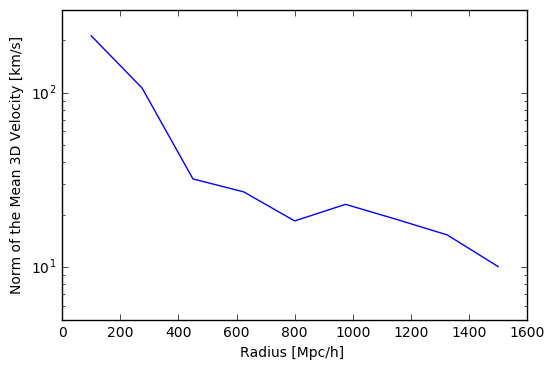

In [54]:
mean_vel =np.sqrt(mean_vel_x**2 + mean_vel_y**2 + mean_vel_z**2)
plt.plot(r_bins, mean_vel)
plt.yscale('log')
plt.ylim([5,300])
plt.xlabel('Radius [Mpc/h] ')
plt.ylabel('Norm of the Mean 3D Velocity [km/s]')